In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

In [7]:
TICKER = 'IAU'
PATH = f'data/{TICKER}-test'

## Load basic data

In [8]:
data = fat.get_price_data(TICKER)

Loaded data for IAU: 2005-01-28 to 2018-02-21.


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600
2018-02-16,12.98,13.03,12.92,12.95,12.95,13618800
2018-02-20,12.88,12.90,12.75,12.77,12.77,13522000
2018-02-21,12.80,12.83,12.70,12.71,12.71,13893600


In [17]:
price = pd.DataFrame(data['Adj Close'])

In [30]:
sma = fat.get_sma_df(price, 'Adj Close', [12,26])
#del sma['Adj
#price = price.join(sma)
sma.columns = ['Price','Fast SMA','Slow SMA']

In [41]:
price['MACD'] = sma['Fast SMA'] - sma['Slow SMA']
macd_sma = fat.get_sma_df(price, 'MACD', [9])
macd_sma.columns = ['MACD','Signal']

price['Signal'] = macd_sma['Signal']
price['Hist'] = price['MACD'] -price['Signal']

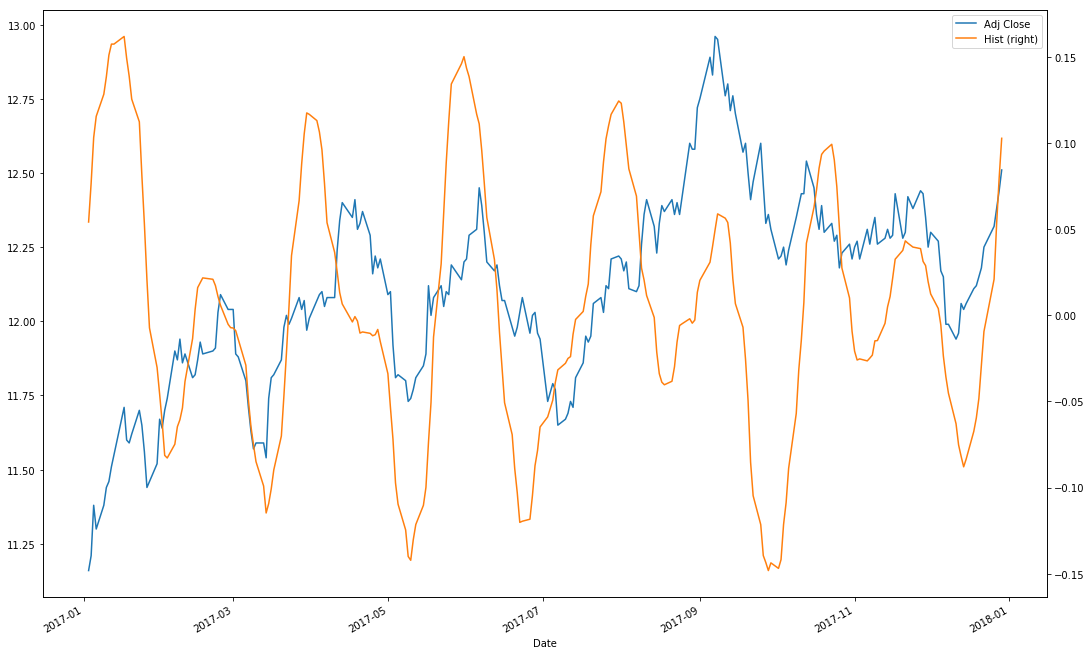

In [45]:
plot_data = price[['Adj Close', 'Hist']]
plot_data['2017'].plot(secondary_y = ['Hist'])